In [6]:
import time, array, random, copy, math
import numpy as np
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] ='\\usepackage{libertine}\n\\usepackage[utf8]{inputenc}'

import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('notebook')

In [8]:
from deap import algorithms, base, benchmarks, tools, creator

In [9]:
random.seed(a=42)

In [19]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", array.array, typecode='d', 
               fitness=creator.FitnessMin, rank=None, crowding_distance=None)

In [20]:
class Individual2(object):
    """Represents one individual"""
    
    def __init__(self):
        self.rank = None
        self.crowding_distance = None
        self.dominated_solutions = set()
        self.features = None
        self.objectives = None
        self.dominates = None
        
    def set_objectives(self, objectives):
        self.objectives = objectives

In [21]:
z = Individual2()
y = creator.Individual

In [22]:
from pprint import pprint

pprint(vars(z))
pprint(vars(y))

{'crowding_distance': None,
 'dominated_solutions': set(),
 'dominates': None,
 'features': None,
 'objectives': None,
 'rank': None}
mappingproxy({'__doc__': None,
              '__init__': <function create.<locals>.initType at 0x7f8db2639d08>,
              '__module__': 'deap.creator',
              'crowding_distance': None,
              'rank': None,
              'typecode': 'd'})


In [46]:
def uniform(low, up, size=None):
    try:
        return [random.uniform(a, b) for a, b in zip(low, up)]
    except TypeError:
        return [random.uniform(a, b) for a, b in zip([low] * size, [up] * size)]

In [47]:
toolbox = base.Toolbox()

In [48]:
NDIM = 30 
BOUND_LOW, BOUND_UP = 0.0, 1.0
toolbox.register("evaluate", lambda ind: benchmarks.dtlz3(ind, 2))

In [49]:
toolbox.register("attr_float", uniform, BOUND_LOW, BOUND_UP, NDIM)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_float)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=20.0)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=20.0, indpb=1.0/NDIM)
toolbox.register("select", tools.selNSGA2)

In [50]:
toolbox.pop_size = 50
toolbox.max_gen = 1000
toolbox.mut_prob = 0.2

In [63]:
def run_ea(toolbox, stats=None, verbose=True):
    pop = toolbox.population(n=toolbox.pop_size)
    
    print("len1=", len(pop))
    print(pop)
    print("")
    print("##############")
    print("")
    
    pop = toolbox.select(pop, len(pop))
    
    print("len2=", len(pop))
    print(pop)
    print("")
    print("##############")
    print("")
    
    return algorithms.eaMuPlusLambda(pop, toolbox, mu=toolbox.pop_size, 
                                     lambda_=toolbox.pop_size, 
                                     cxpb=1-toolbox.mut_prob,
                                     mutpb=toolbox.mut_prob, 
                                     stats=stats, 
                                     ngen=toolbox.max_gen, 
                                     verbose=verbose)

In [82]:
run_ea(toolbox)

len1= 50
[array('d', [0.2962812589008994, 0.8952666346722422, 0.07150351169175462, 0.41965257596315475, 0.014725231316303433, 0.9632308068793126, 0.5534195422762613, 0.6527134058323956, 0.8688868925875463, 0.8565057093704588, 0.8888905130348783, 0.3519892324315548, 0.9791945299008229, 0.35886334668875175, 0.42781795343080764, 0.5941935070129266, 0.20023750693857245, 0.8096100158835118, 0.2226837946072232, 0.5357592390752481, 0.999738762591738, 0.9733142189130303, 0.6155247031476249, 0.46251682655230586, 0.699427782079015, 0.16039390912946816, 0.34175471374491284, 0.47402236458676983, 0.16913668658370984, 0.09938231089099048]), array('d', [0.5166378404599948, 0.9598208541969543, 0.21844257634367292, 0.8514631563654412, 0.6951195309056138, 0.9276290397095185, 0.3055140136930752, 0.823501047388014, 0.5914418148325108, 0.09643744722379921, 0.304606726424243, 0.4761577557394461, 0.1631406289977556, 0.576144106023672, 0.1533310518613873, 0.41865187230192147, 0.8390153465582011, 0.06645256065

11 	50    
12 	50    
13 	50    
14 	50    
15 	50    
16 	50    
17 	50    
18 	50    
19 	50    
20 	50    
21 	50    
22 	50    
23 	50    
24 	50    
25 	50    
26 	50    
27 	50    
28 	50    
29 	50    
30 	50    
31 	50    
32 	50    
33 	50    
34 	50    
35 	50    
36 	50    
37 	50    
38 	50    
39 	50    
40 	50    
41 	50    
42 	50    
43 	50    
44 	50    
45 	50    
46 	50    
47 	50    
48 	50    
49 	50    
50 	50    
51 	50    
52 	50    
53 	50    
54 	50    
55 	50    
56 	50    
57 	50    
58 	50    
59 	50    
60 	50    
61 	50    
62 	50    
63 	50    
64 	50    
65 	50    
66 	50    
67 	50    
68 	50    
69 	50    
70 	50    
71 	50    
72 	50    
73 	50    
74 	50    
75 	50    
76 	50    
77 	50    
78 	50    
79 	50    
80 	50    
81 	50    
82 	50    
83 	50    
84 	50    
85 	50    
86 	50    
87 	50    
88 	50    
89 	50    
90 	50    
91 	50    
92 	50    
93 	50    
94 	50    
95 	50    
96 	50    
97 	50    
98 	50    
99 	50    
100	50    
101	50    

765	50    
766	50    
767	50    
768	50    
769	50    
770	50    
771	50    
772	50    
773	50    
774	50    
775	50    
776	50    
777	50    
778	50    
779	50    
780	50    
781	50    
782	50    
783	50    
784	50    
785	50    
786	50    
787	50    
788	50    
789	50    
790	50    
791	50    
792	50    
793	50    
794	50    
795	50    
796	50    
797	50    
798	50    
799	50    
800	50    
801	50    
802	50    
803	50    
804	50    
805	50    
806	50    
807	50    
808	50    
809	50    
810	50    
811	50    
812	50    
813	50    
814	50    
815	50    
816	50    
817	50    
818	50    
819	50    
820	50    
821	50    
822	50    
823	50    
824	50    
825	50    
826	50    
827	50    
828	50    
829	50    
830	50    
831	50    
832	50    
833	50    
834	50    
835	50    
836	50    
837	50    
838	50    
839	50    
840	50    
841	50    
842	50    
843	50    
844	50    
845	50    
846	50    
847	50    
848	50    
849	50    
850	50    
851	50    
852	50    
853	50    
854	50    
855	50    

([array('d', [0.9999999974815826, 0.49972580423217017, 0.6999519045702874, 0.6998825736603538, 0.5003870084557079, 0.5989398645571166, 0.4004342598831965, 0.4001122895199815, 0.49994815369449475, 0.2006626487776042, 0.5000122577482253, 0.39993212942154804, 0.5004715120214609, 0.499993756096345, 0.5002989291520555, 0.5996285623288025, 0.5000005764057849, 0.7003995973958274, 0.4002843648967104, 0.5000766239202802, 0.49996900827510915, 0.49992599399300786, 0.5004006449038287, 0.6000851664470224, 0.6001663088989531, 0.5000290263566667, 0.4000125050356468, 0.5000705154426625, 0.6999068361592542, 0.4998963116047121]),
  array('d', [0.9999999974815826, 0.49972580423217017, 0.6999519045702874, 0.6998825736603538, 0.5003870084557079, 0.5989398645571166, 0.4004342598831965, 0.4001122895199815, 0.49994815369449475, 0.2006626487776042, 0.5000122577482253, 0.39993212942154804, 0.5004715120214609, 0.499993756096345, 0.5002989291520555, 0.5996285623288025, 0.5000005764057849, 0.7003995973958274, 0.40

In [66]:
%time res,_ = run_ea(toolbox)

In [53]:
fronts = tools.emo.sortLogNondominated(res, len(res))

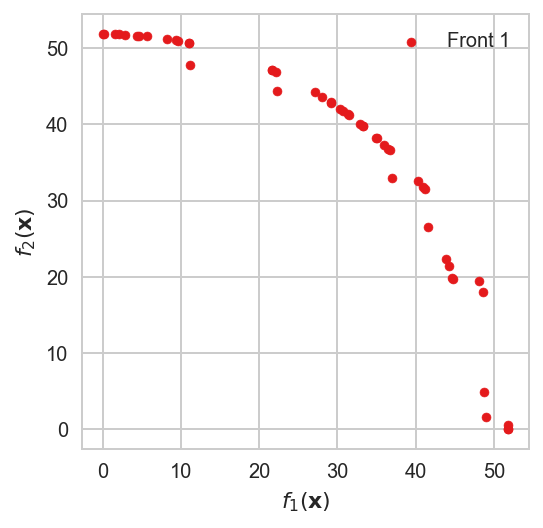

In [54]:
plot_colors = seaborn.color_palette("Set1", n_colors=10)
fig, ax = plt.subplots(1, figsize=(4,4))
for i,inds in enumerate(fronts):
    par = [toolbox.evaluate(ind) for ind in inds]
    df = pd.DataFrame(par)
    df.plot(ax=ax, kind='scatter', label='Front ' + str(i+1), 
                 x=df.columns[0], y=df.columns[1], 
                 color=plot_colors[i])
plt.xlabel('$f_1(\mathbf{x})$');plt.ylabel('$f_2(\mathbf{x})$');

In [68]:
individuals = [0,1,2,3,4,5,6,7,8,9]
print(individuals)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [76]:
import deap
deap.tools.selNSGA2(individuals, 5)

AttributeError: 'int' object has no attribute 'fitness'

In [78]:
x = [1, 2, 3]
y = [4, 5, 6]

print(x, y)

[1, 2, 3] [4, 5, 6]


In [79]:
zipped = zip(x, y)

In [80]:
list(zipped)

[(1, 4), (2, 5), (3, 6)]

In [81]:
x2, y2 = zip(*zip(x, y))
x == list(x2) and y == list(y2)

True

In [ ]:
def rodrigoNSGA2(pop, tam):
    sum(pop)